 # Marie McCrary

## This notebook loads Mackenzie River data and analyzes it using pandas

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm

%matplotlib inline

# Mackenzie River Temperatures


Read in data from two datasets: ArcticGRO (the Water Quality dataset) and GEMS. <br />
ArcticGRO -> df_a <br />
ArcticGRO temperatures -> Temp <br />
GEMS -> df_g <br />

Some notes about this data:
1. The data were collected over several decades, and the data were not always consistently collected
2. The temperature data has large temporal gaps and few datapoints are in the ArcticGRO dataset

In [2]:
# d1 = pd.read_csv('~/Research/Rivers/River_temperature/GEMS_MackenzieRiver_Temperature.csv', header=0, parse_dates=[1], index_col=[1]) 
# df_g = pd.DataFrame(data=d1) 
# df_g = df_g.rename(columns = {'Value': 'Temp'})
# df_g = df_g[df_g['Temp'].notna()]
# df_g = df_g[df_g.Temp != 25]
# df_g = df_g[df_g.Temp != 18.7]
# df_g

In [3]:
d2 = pd.read_csv('~/Research/Rivers/River_temperature/ArcticGRO_Water_Quality_Data_Mackenzie.csv', header=8, parse_dates=[2], index_col=[2]) 
df_a = pd.DataFrame(data=d2) 
df_a=df_a.drop([df_a.index[0]])
df_a.index = pd.to_datetime(df_a.index)
df_a['Temp'] = df_a.Temp.astype(float, errors = 'raise')
df_a = df_a[df_a['Temp'].notna()]


In [4]:
d3 = pd.read_csv('~/Research/Rivers/River_temperature/Env_Canada_WQ.csv', header=0, parse_dates=[1], index_col=[1]) 
df_e = pd.DataFrame(data = d3)
df_e = df_e.loc[df_e.VARIABLE == 'TEMPERATURE WATER']
df_e = df_e.loc[df_e.SITE_NO == 'NW10LA0003']
df_e['VALUE_VALEUR'] = df_e.VALUE_VALEUR.astype(float, errors = 'raise')
df_e = df_e.rename(columns = {'VALUE_VALEUR': 'Temp'})
df_e = df_e[df_e['Temp'].notna()]


In [5]:
d4 = pd.read_csv('~/Research/Rivers/River_temperature/MackenzieARR_WT.csv', header=0, parse_dates=[4], index_col=[4]) 
df_e2 = pd.DataFrame(data = d4)
df_e2 = df_e2.rename(columns = {'TEMPERATURE WATER (Grouped Deg C)':'Temp'})


In [6]:
d5 = pd.read_csv('~/Research/Rivers/River_Temperature/10LC014_WT.csv', nrows = 288, parse_dates=[0], index_col=[0]) 
df_e3 = pd.DataFrame(data = d5)
df_e3 = df_e3.rename(columns = {'WT':'Temp'})


Combine datasets to clean up code. All temperature data are in temperature dataframe.

In [7]:
series1 = pd.Series(df_a.Temp)
series2 = pd.Series(df_e.Temp)
series3 = pd.Series(df_e2.Temp)
series4 = pd.Series(df_e3.Temp)
# series5 = pd.Series(df_g.Temp)
temperature = pd.concat([series1, series2, series3, series4]).sort_index()
temperature

1960-06-08    11.1
1960-06-22    14.4
1960-07-06    16.1
1960-07-20    15.0
1960-08-03    16.7
              ... 
2020-08-18    15.0
2020-10-07     7.0
2021-01-14     0.5
2021-01-28    -0.5
2021-03-11     0.0
Name: Temp, Length: 763, dtype: float64

In [8]:
temp_grouped = temperature.groupby(temperature.index.month)
# df_g_grouped = df_g.Temp.groupby(df_g.index.month)
df_a_grouped = df_a.Temp.groupby(df_a.index.month)
df_e_grouped = df_e.Temp.groupby(df_e.index.month)
df_e2_grouped = df_e2.Temp.groupby(df_e2.index.month)
df_e3_grouped = df_e3.Temp.groupby(df_e3.index.month)

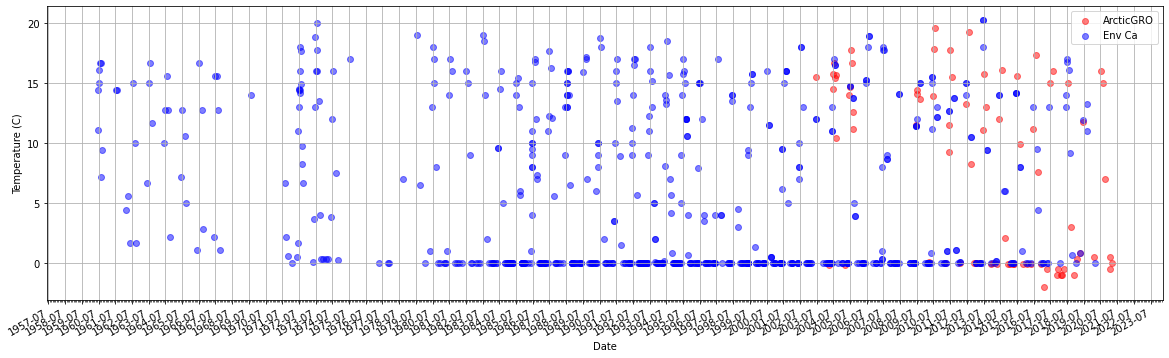

In [9]:
fig, ax = plt.subplots(figsize=(20,6))

# ax.scatter(df_g.index.values, df_g.Temp, color = 'Green', label = 'GEMS', alpha = 0.5)
ax.scatter(df_a.index.values, df_a.Temp, color = 'Red', label = 'ArcticGRO', alpha = 0.5)
ax.scatter(df_e.index.values, df_e.Temp, color = 'Blue', label = 'Env Ca', alpha = 0.5)
ax.scatter(df_e2.index.values, df_e2.Temp, color = 'Blue', alpha = 0.5)
ax.scatter(df_e3.index.values, df_e3.Temp, color = 'Blue', alpha = 0.5)


ax.set(xlabel="Date",
       ylabel="Temperature (C)")

# Major ticks every x months.
fmt_half_year = mdates.MonthLocator(interval=12)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

ax.legend()
plt.grid()
plt.show()


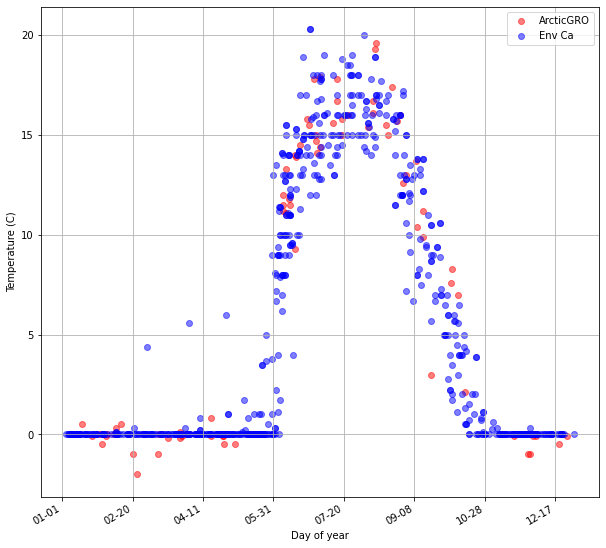

In [11]:
fig, ax = plt.subplots(figsize=(10,10))

#ax.scatter(df_g.index.day_of_year, df_g['Temp'], color = 'Green', label = 'GEMS', alpha = 0.5)
ax.scatter(df_a.index.day_of_year, df_a['Temp'], color = 'Red', label = 'ArcticGRO', alpha = 0.5)
ax.scatter(df_e.index.day_of_year, df_e['Temp'], color = 'Blue', label = 'Env Ca', alpha = 0.5)
ax.scatter(df_e2.index.day_of_year, df_e2['Temp'], color = 'Blue', alpha = 0.5)
ax.scatter(df_e3.index.day_of_year, df_e3['Temp'], color = 'Blue', alpha = 0.5)

ax.set(xlabel="Day of year",
       ylabel="Temperature (C)")
ax.legend()


# # Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# # Rotates and right aligns the x labels, and moves the bottom of the
# # axes up to make room for them.
fig.autofmt_xdate()
plt.grid()

# ax.legend()
plt.show()
#April 1 to Nov 1, fit a curve through both


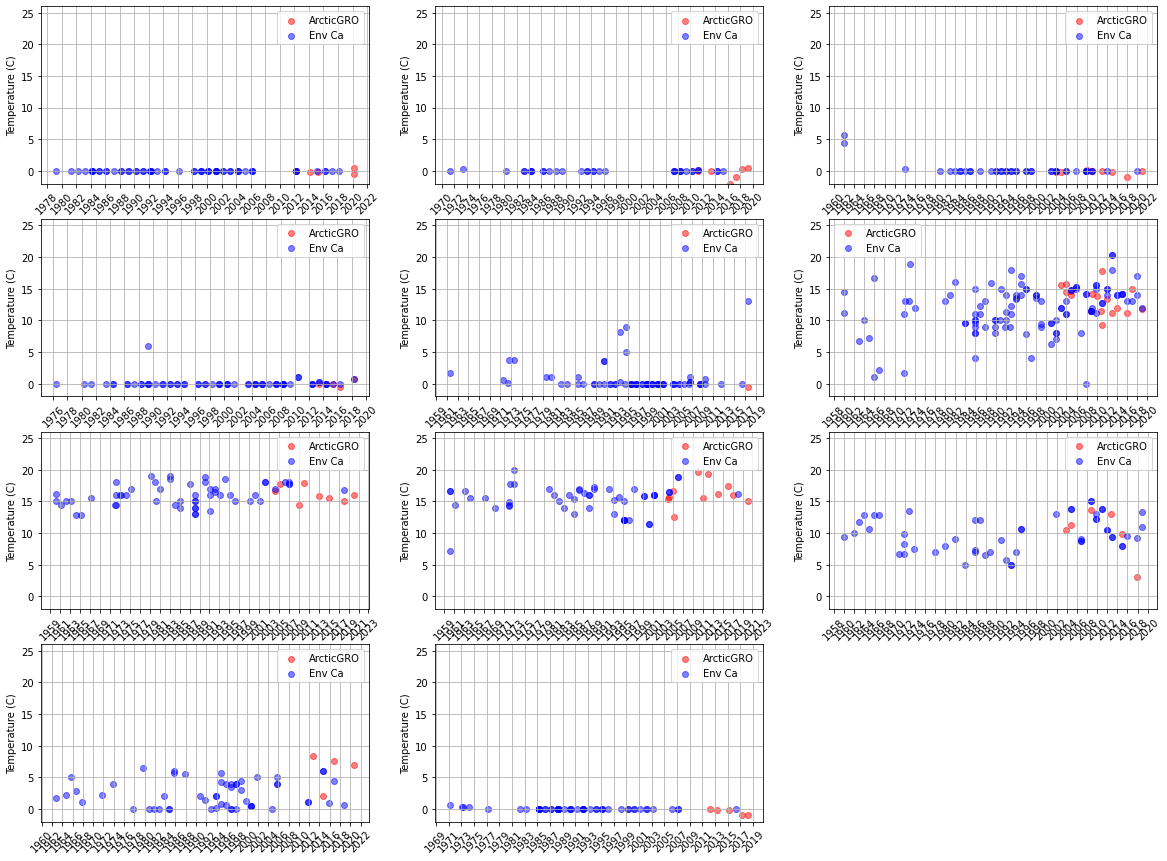

In [52]:

fig, axs = plt.subplots()
axs.set_axis_off()
fig.set_figheight(15)
fig.set_figwidth(20)

# left = datetime.date(1999, 1, 1)
# right = datetime.date(2021, 1, 1)


for i in range(1,12):
    axs = fig.add_subplot(4,3,i)
    axs.set_ylim([-2,26])
    # axs.set_xlim([left, right])
    plt.scatter(df_a_grouped.get_group(i).index, df_a_grouped.get_group(i), color = 'Red', label = 'ArcticGRO', alpha = 0.5)
    plt.scatter(df_e_grouped.get_group(i).index, df_e_grouped.get_group(i), color = 'Blue', label = 'Env Ca', alpha = 0.5)
    plt.scatter(df_e2_grouped.get_group(i).index, df_e2_grouped.get_group(i), color = 'Blue', alpha = 0.5)
    plt.scatter(df_e3_grouped.get_group(i).index, df_e3_grouped.get_group(i), color = 'Blue', alpha = 0.5)
    axs.legend()
   
    # Major ticks every year.
    fmt_year = mdates.MonthLocator(interval=24)
    axs.xaxis.set_major_locator(fmt_year)
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation = 45)
    axs.set(ylabel="Temperature (C)")
    plt.grid()

axs.legend()
plt.show()
# Group by day of year
# Why is there such a range of temperatures in September of 2010?
# Plot August and September temperatures by day
# Plot 2010 from May through September by day

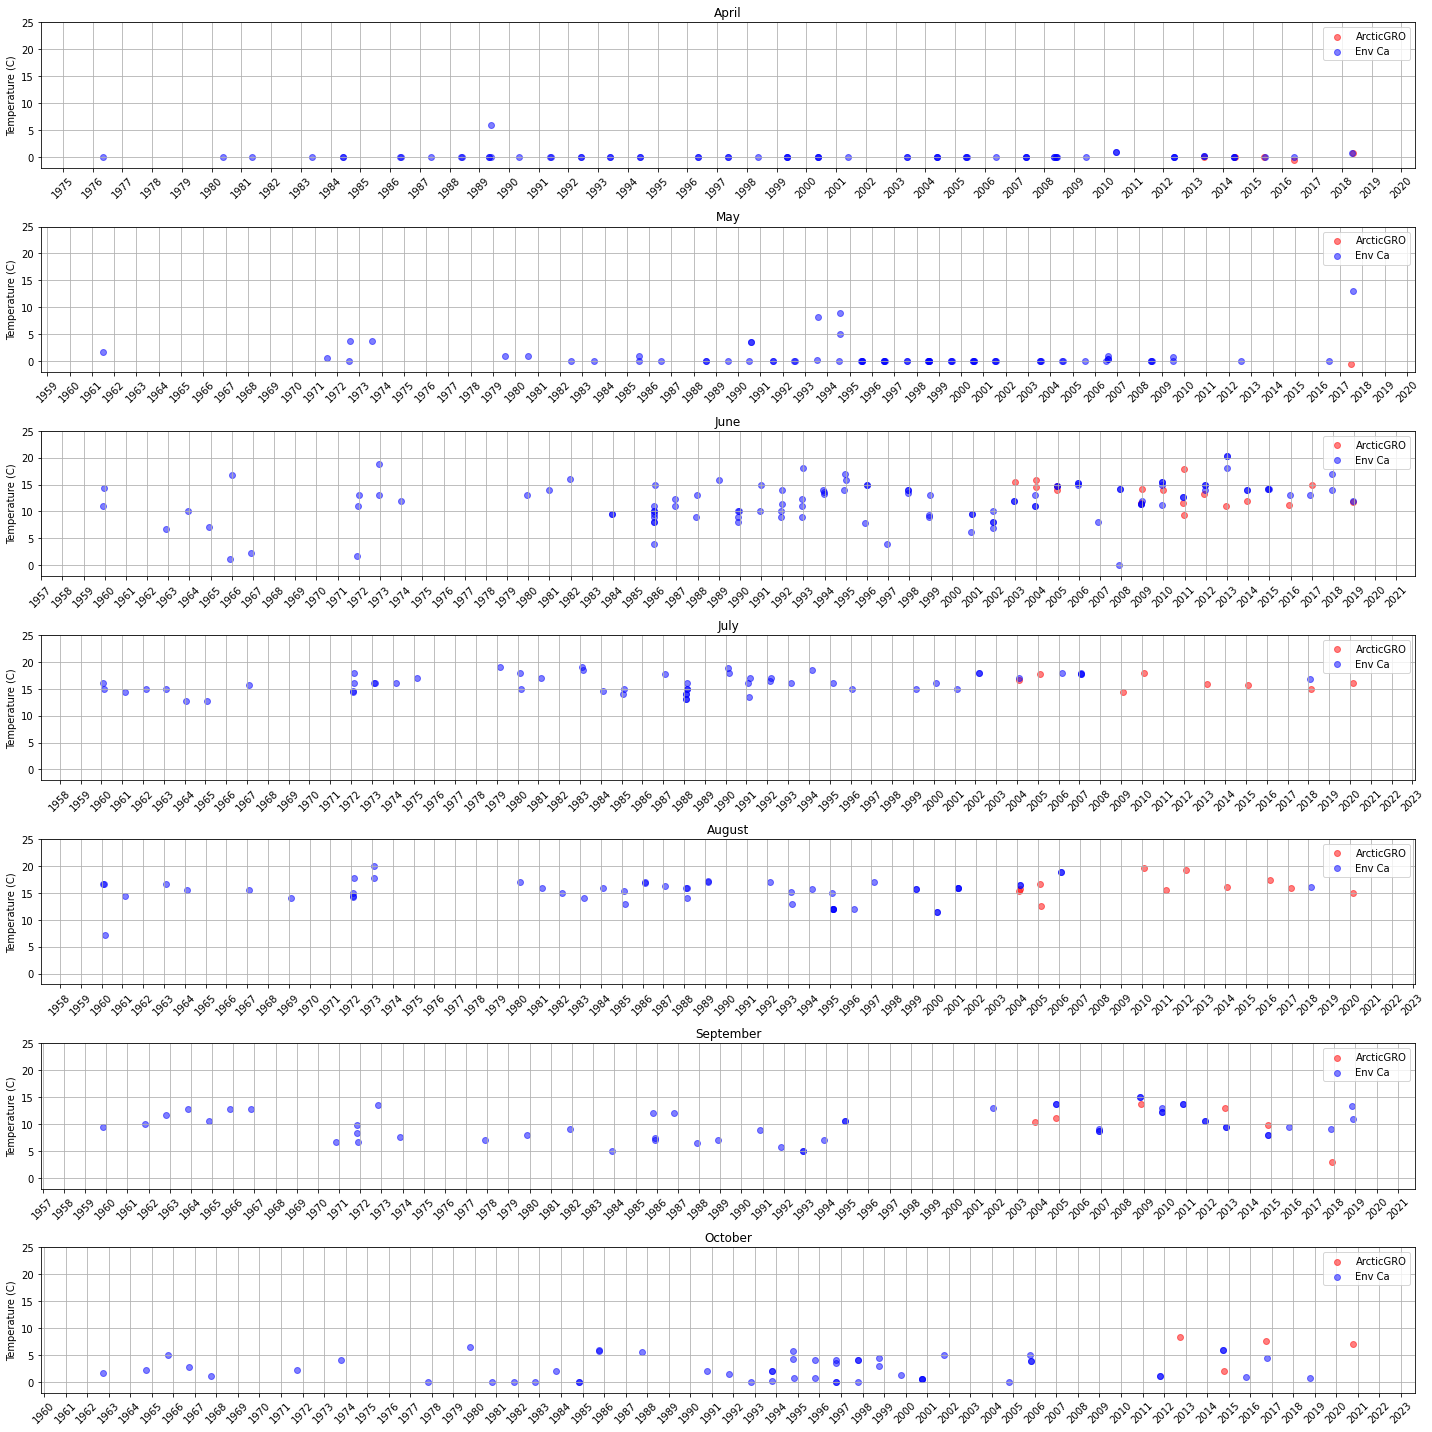

In [60]:

fig, axs = plt.subplots()
axs.set_axis_off()
fig.set_figheight(20)
fig.set_figwidth(20)
n = 7
# left = datetime.date(1999, 1, 1)
# right = datetime.date(2021, 1, 1)

axs = fig.add_subplot(n,1,1)
axs.set_ylim([-2,25])
# axs.set_xlim([left, right])
plt.scatter(df_a_grouped.get_group(4).index, df_a_grouped.get_group(4), color = 'Red', label = 'ArcticGRO', alpha = 0.5)
plt.scatter(df_e_grouped.get_group(4).index, df_e_grouped.get_group(4), color = 'Blue', label = 'Env Ca', alpha = 0.5)
plt.scatter(df_e2_grouped.get_group(4).index, df_e2_grouped.get_group(4), color = 'Blue', alpha = 0.5)
plt.scatter(df_e3_grouped.get_group(4).index, df_e3_grouped.get_group(4), color = 'Blue', alpha = 0.5)
axs.legend()

   
# Major ticks every year.
fmt_year = mdates.MonthLocator(interval=12)
axs.xaxis.set_major_locator(fmt_year)
axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation = 45)
axs.set(ylabel="Temperature (C)")
plt.grid()
axs.legend()
plt.title("April")



axs = fig.add_subplot(n,1,2)
axs.set_ylim([-2,25])
# axs.set_xlim([left, right])
plt.scatter(df_a_grouped.get_group(5).index, df_a_grouped.get_group(5), color = 'Red', label = 'ArcticGRO', alpha = 0.5)
plt.scatter(df_e_grouped.get_group(5).index, df_e_grouped.get_group(5), color = 'Blue', label = 'Env Ca', alpha = 0.5)
plt.scatter(df_e2_grouped.get_group(5).index, df_e2_grouped.get_group(5), color = 'Blue', alpha = 0.5)
plt.scatter(df_e3_grouped.get_group(5).index, df_e3_grouped.get_group(5), color = 'Blue', alpha = 0.5)
axs.legend()

   
# Major ticks every year.
fmt_year = mdates.MonthLocator(interval=12)
axs.xaxis.set_major_locator(fmt_year)
axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation = 45)
axs.set(ylabel="Temperature (C)")
plt.grid()
axs.legend()
plt.title("May")

axs = fig.add_subplot(n,1,3)
axs.set_ylim([-2,25])
# axs.set_xlim([left, right])
plt.scatter(df_a_grouped.get_group(6).index, df_a_grouped.get_group(6), color = 'Red', label = 'ArcticGRO', alpha = 0.5)
plt.scatter(df_e_grouped.get_group(6).index, df_e_grouped.get_group(6), color = 'Blue', label = 'Env Ca', alpha = 0.5)
plt.scatter(df_e2_grouped.get_group(6).index, df_e2_grouped.get_group(6), color = 'Blue', alpha = 0.5)
plt.scatter(df_e3_grouped.get_group(6).index, df_e3_grouped.get_group(6), color = 'Blue', alpha = 0.5)
axs.legend()
   
# Major ticks every year.
fmt_year = mdates.MonthLocator(interval=12)
axs.xaxis.set_major_locator(fmt_year)
axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation = 45)
axs.set(ylabel="Temperature (C)")
plt.grid()
axs.legend()
plt.title("June")

axs = fig.add_subplot(n,1,4)
axs.set_ylim([-2,25])
# axs.set_xlim([left, right])
plt.scatter(df_a_grouped.get_group(7).index, df_a_grouped.get_group(7), color = 'Red', label = 'ArcticGRO', alpha = 0.5)
plt.scatter(df_e_grouped.get_group(7).index, df_e_grouped.get_group(7), color = 'Blue', label = 'Env Ca', alpha = 0.5)
plt.scatter(df_e2_grouped.get_group(7).index, df_e2_grouped.get_group(7), color = 'Blue', alpha = 0.5)
plt.scatter(df_e3_grouped.get_group(7).index, df_e3_grouped.get_group(7), color = 'Blue', alpha = 0.5)
axs.legend()
   
# Major ticks every year.
fmt_year = mdates.MonthLocator(interval=12)
axs.xaxis.set_major_locator(fmt_year)
axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation = 45)
axs.set(ylabel="Temperature (C)")
plt.grid()
axs.legend()
plt.title("July")

axs = fig.add_subplot(n,1,5)
axs.set_ylim([-2,25])
# axs.set_xlim([left, right])
plt.scatter(df_a_grouped.get_group(8).index, df_a_grouped.get_group(8), color = 'Red', label = 'ArcticGRO', alpha = 0.5)
plt.scatter(df_e_grouped.get_group(8).index, df_e_grouped.get_group(8), color = 'Blue', label = 'Env Ca', alpha = 0.5)
plt.scatter(df_e2_grouped.get_group(8).index, df_e2_grouped.get_group(8), color = 'Blue', alpha = 0.5)
plt.scatter(df_e3_grouped.get_group(8).index, df_e3_grouped.get_group(8), color = 'Blue', alpha = 0.5)
axs.legend()
   
# Major ticks every year.
fmt_year = mdates.MonthLocator(interval=12)
axs.xaxis.set_major_locator(fmt_year)
axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation = 45)
axs.set(ylabel="Temperature (C)")
plt.grid()
axs.legend()
plt.title("August")

axs = fig.add_subplot(n,1,6)
axs.set_ylim([-2,25])
# axs.set_xlim([left, right])
plt.scatter(df_a_grouped.get_group(9).index, df_a_grouped.get_group(9), color = 'Red', label = 'ArcticGRO', alpha = 0.5)
plt.scatter(df_e_grouped.get_group(9).index, df_e_grouped.get_group(9), color = 'Blue', label = 'Env Ca', alpha = 0.5)
plt.scatter(df_e2_grouped.get_group(9).index, df_e2_grouped.get_group(9), color = 'Blue', alpha = 0.5)
plt.scatter(df_e3_grouped.get_group(9).index, df_e3_grouped.get_group(9), color = 'Blue', alpha = 0.5)
axs.legend()
   
# Major ticks every year.
fmt_year = mdates.MonthLocator(interval=12)
axs.xaxis.set_major_locator(fmt_year)
axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation = 45)
axs.set(ylabel="Temperature (C)")
plt.grid()
axs.legend()
plt.title("September")

axs = fig.add_subplot(n,1,7)
axs.set_ylim([-2,25])
# axs.set_xlim([left, right])
plt.scatter(df_a_grouped.get_group(10).index, df_a_grouped.get_group(10), color = 'Red', label = 'ArcticGRO', alpha = 0.5)
plt.scatter(df_e_grouped.get_group(10).index, df_e_grouped.get_group(10), color = 'Blue', label = 'Env Ca', alpha = 0.5)
plt.scatter(df_e2_grouped.get_group(10).index, df_e2_grouped.get_group(10), color = 'Blue', alpha = 0.5)
plt.scatter(df_e3_grouped.get_group(10).index, df_e3_grouped.get_group(10), color = 'Blue', alpha = 0.5)
axs.legend()
   
# Major ticks every year.
fmt_year = mdates.MonthLocator(interval=12)
axs.xaxis.set_major_locator(fmt_year)
axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation = 45)
axs.set(ylabel="Temperature (C)")
plt.grid()
axs.legend()
plt.title("October")


fig.tight_layout()
plt.show()

Potential outliers: April 1990, May 1990, 1993, 1994, 2017, June 1997, 2008, Sept 2018. Plot individual years it see if these points are erroneous

In [19]:
import datetime

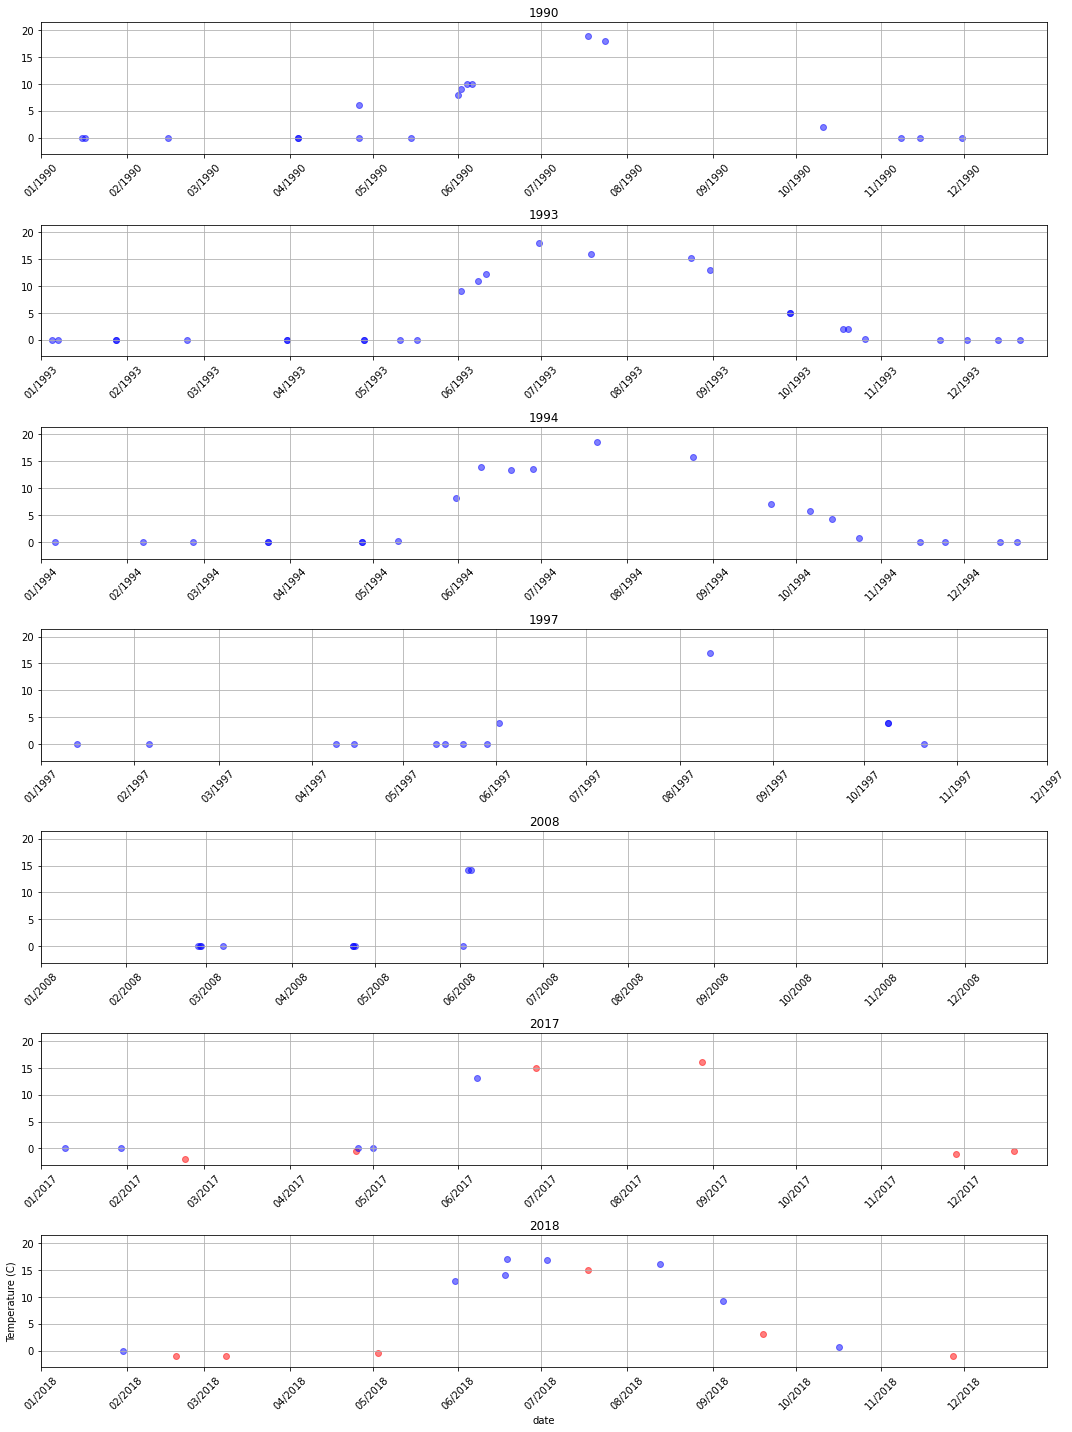

In [61]:
fig, ax = plt.subplots()
ax.set_axis_off()
n = 7
# Plot 1990, 1993, 1994, 1997, 2008, 2017, 2018
fig.set_figheight(20)
fig.set_figwidth(15)

ax = fig.add_subplot(n,1,1)
left = datetime.date(1990, 1, 1)
right = datetime.date(1990, 12, 31)
ax.scatter(df_a.index.values, df_a.Temp, color = 'Red', label = 'ArcticGRO', alpha = 0.5)
ax.scatter(df_e.index.values, df_e.Temp, color = 'Blue', label = 'Env Ca', alpha = 0.5)
ax.scatter(df_e2.index.values, df_e2.Temp, color = 'Blue', alpha = 0.5)
ax.scatter(df_e3.index.values, df_e3.Temp, color = 'Blue', alpha = 0.5)
ax.set_xlim([left, right])

plt.grid()
fmt_year = mdates.MonthLocator()
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.xticks(rotation = 45)
plt.title('1990')

ax = fig.add_subplot(n,1,2)
left = datetime.date(1993, 1, 1)
right = datetime.date(1993, 12, 31)
ax.scatter(df_a.index.values, df_a.Temp, color = 'Red', label = 'ArcticGRO', alpha = 0.5)
ax.scatter(df_e.index.values, df_e.Temp, color = 'Blue', label = 'Env Ca', alpha = 0.5)
ax.scatter(df_e2.index.values, df_e2.Temp, color = 'Blue', alpha = 0.5)
ax.scatter(df_e3.index.values, df_e3.Temp, color = 'Blue', alpha = 0.5)
ax.set_xlim([left, right])

plt.grid()
fmt_year = mdates.MonthLocator()
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.xticks(rotation = 45)
plt.title('1993')

ax = fig.add_subplot(n,1,3)
left = datetime.date(1994, 1, 1)
right = datetime.date(1994, 12, 31)
ax.scatter(df_a.index.values, df_a.Temp, color = 'Red', label = 'ArcticGRO', alpha = 0.5)
ax.scatter(df_e.index.values, df_e.Temp, color = 'Blue', label = 'Env Ca', alpha = 0.5)
ax.scatter(df_e2.index.values, df_e2.Temp, color = 'Blue', alpha = 0.5)
ax.scatter(df_e3.index.values, df_e3.Temp, color = 'Blue', alpha = 0.5)
ax.set_xlim([left, right])

plt.grid()
fmt_year = mdates.MonthLocator()
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.xticks(rotation = 45)
plt.title('1994')

ax = fig.add_subplot(n,1,4)
left = datetime.date(1997, 1, 1)
right = datetime.date(1997, 12, 1)
ax.scatter(df_a.index.values, df_a.Temp, color = 'Red', label = 'ArcticGRO', alpha = 0.5)
ax.scatter(df_e.index.values, df_e.Temp, color = 'Blue', label = 'Env Ca', alpha = 0.5)
ax.scatter(df_e2.index.values, df_e2.Temp, color = 'Blue', alpha = 0.5)
ax.scatter(df_e3.index.values, df_e3.Temp, color = 'Blue', alpha = 0.5)
ax.set_xlim([left, right])

plt.grid()
fmt_year = mdates.MonthLocator()
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.xticks(rotation = 45)
plt.title('1997')

ax = fig.add_subplot(n,1,5)
left = datetime.date(2008, 1, 1)
right = datetime.date(2008, 12, 31)
ax.scatter(df_a.index.values, df_a.Temp, color = 'Red', label = 'ArcticGRO', alpha = 0.5)
ax.scatter(df_e.index.values, df_e.Temp, color = 'Blue', label = 'Env Ca', alpha = 0.5)
ax.scatter(df_e2.index.values, df_e2.Temp, color = 'Blue', alpha = 0.5)
ax.scatter(df_e3.index.values, df_e3.Temp, color = 'Blue', alpha = 0.5)
ax.set_xlim([left, right])

plt.grid()
fmt_year = mdates.MonthLocator()
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.xticks(rotation = 45)
plt.title('2008')

ax = fig.add_subplot(n,1,6)
left = datetime.date(2017, 1, 1)
right = datetime.date(2017, 12, 31)
ax.scatter(df_a.index.values, df_a.Temp, color = 'Red', label = 'ArcticGRO', alpha = 0.5)
ax.scatter(df_e.index.values, df_e.Temp, color = 'Blue', label = 'Env Ca', alpha = 0.5)
ax.scatter(df_e2.index.values, df_e2.Temp, color = 'Blue', alpha = 0.5)
ax.scatter(df_e3.index.values, df_e3.Temp, color = 'Blue', alpha = 0.5)
ax.set_xlim([left, right])

plt.grid()
fmt_year = mdates.MonthLocator()
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.xticks(rotation = 45)
plt.title('2017')

ax = fig.add_subplot(n,1,7)
left = datetime.date(2018, 1, 1)
right = datetime.date(2018, 12, 31)
ax.scatter(df_a.index.values, df_a.Temp, color = 'Red', label = 'ArcticGRO', alpha = 0.5)
ax.scatter(df_e.index.values, df_e.Temp, color = 'Blue', label = 'Env Ca', alpha = 0.5)
ax.scatter(df_e2.index.values, df_e2.Temp, color = 'Blue', alpha = 0.5)
ax.scatter(df_e3.index.values, df_e3.Temp, color = 'Blue', alpha = 0.5)
ax.set_xlim([left, right])

plt.grid()
fmt_year = mdates.MonthLocator()
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.xticks(rotation = 45)
plt.title('2018')

ax.set(ylabel = "Temperature (C)", xlabel = 'date')

fig.tight_layout()
plt.show()

Erroneous points: June 2008 (too low). Everything else looks legit

## Monthly trends in temperature

Temperature Trend = 0.00024475524475524476
NRMSE: 0.08927175330795688
Temperature Trend = 0.006932457786116324
NRMSE: 0.14313064919580296
Temperature Trend = -0.008045248868778282
NRMSE: 0.14948376829140836
Temperature Trend = -0.002636825519325999
NRMSE: 0.11213108809679463
Temperature Trend = -0.03977426201041866
NRMSE: 0.15300132424823204
Temperature Trend = -0.01558457536557923
NRMSE: 0.17513599428409504
Temperature Trend = 0.00617319508448553
NRMSE: 0.2635925355943039
Temperature Trend = -0.018680875576036655
NRMSE: 0.17147740909832268
Temperature Trend = -0.012250146113384191
NRMSE: 0.23452404083411912
Temperature Trend = -0.014177612353502143
NRMSE: 0.2791253512454677
Temperature Trend = 0.0013511369645690114
NRMSE: 0.12850508744493583
Temperature Trend = 0.003574046920821114
NRMSE: 0.16577113082575404


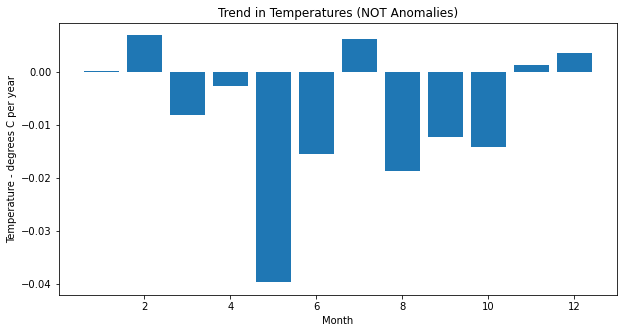

In [28]:
temp_trend = []
temp_nrmse = []
temp_trend_test = []
for i in range(1,13):
    #To perform the linear regression we need the dates to be numeric
    #date_ord = temp_grouped.get_group(i).index.values(datetime.date.toordinal)

    # perform regression
    coefficients, residuals, _, _, _ = np.polyfit(range(len(temp_grouped.get_group(i).index.values)),temp_grouped.get_group(i),1,full=True)
    mse = residuals[0]/(len(temp_grouped.get_group(i).index))
    nrmse = np.sqrt(mse)/(temp_grouped.get_group(i).max() - temp_grouped.get_group(i).min()) # or mean?
    temp_trend.append(coefficients[0])
    temp_nrmse.append(nrmse)
    print('Temperature Trend = ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))
    temp_trend_test.append(coefficients[1])
    
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(range(1,13), temp_trend)


plt.xlabel("Month")
plt.ylabel("Temperature - degrees C per year")
plt.title("Trend in Temperatures (NOT Anomalies)")

plt.show()

### Mean temperature for each month:
monthly_mean_temperature is the mean for each month in the series (237 months). <br />
monthly_mean is the mean of all the monthly means for each month.

In [29]:
monthly_mean_temperature = temperature.resample('M').mean().dropna()
monthly_mean = monthly_mean_temperature.groupby(monthly_mean_temperature.index.month).agg('mean')
monthly_min_temperature = temperature.resample('M').min().dropna()
monthly_min = monthly_min_temperature.groupby(monthly_min_temperature.index.month).agg('min')
monthly_max_temperature = temperature.resample('M').max().dropna()
monthly_max = monthly_max_temperature.groupby(monthly_max_temperature.index.month).agg('max')

In [30]:
monthly_mean_temperature

1960-06-30    12.750000
1960-07-31    15.550000
1960-08-31    13.533333
1960-09-30     9.400000
1961-07-31    14.400000
                ...    
2020-07-31    16.000000
2020-08-31    15.000000
2020-10-31     7.000000
2021-01-31     0.000000
2021-03-31     0.000000
Name: Temp, Length: 409, dtype: float64

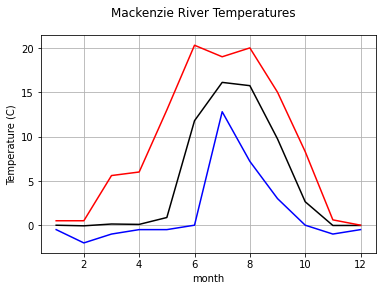

In [31]:
fig, ax = plt.subplots()
fig.suptitle('Mackenzie River Temperatures')

ax.plot(monthly_mean, label = 'Mean', color = 'black')
ax.plot(monthly_min, label = 'Min', color = 'blue')
ax.plot(monthly_max, label = 'Max', color = 'red')
#ax.fill_between(range(1,13), monthly_min_temperature, monthly_max_temperature, color = 'gray', alpha = 0.25)
ax.set(ylabel = "Temperature (C)", xlabel = 'month')
plt.grid()

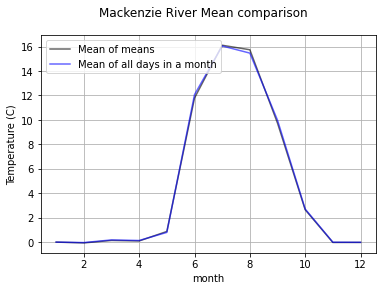

In [32]:
monthly_mean_old = temperature.groupby(temperature.index.month).agg('mean')

fig, ax = plt.subplots()
fig.suptitle('Mackenzie River Mean comparison')

ax.plot(monthly_mean, label = 'Mean of means', color = 'black', alpha = 0.6)
ax.plot(monthly_mean_old, label = 'Mean of all days in a month', color = 'blue', alpha = 0.6)
ax.set(ylabel = "Temperature (C)", xlabel = 'month')
ax.legend()
plt.grid()
# They are very close. Plot difference

## River Temperature Anomalies

In [33]:
anomaly = []

for i in range(1,13):
    diff = monthly_mean_temperature.groupby(monthly_mean_temperature.index.month).get_group(i) - monthly_mean[i]
    anomaly.append(diff)

In [34]:
anomaly[8]

1960-09-30   -0.331306
1962-09-30    0.268694
1963-09-30    1.968694
1964-09-30    3.068694
1965-09-30    0.868694
1966-09-30    3.068694
1967-09-30    3.068694
1971-09-30   -3.031306
1972-09-30   -1.464640
1973-09-30    3.768694
1974-09-30   -2.231306
1978-09-30   -2.731306
1980-09-30   -1.731306
1982-09-30   -0.731306
1984-09-30   -4.731306
1986-09-30   -0.964640
1987-09-30    2.368694
1988-09-30   -3.231306
1989-09-30   -2.731306
1991-09-30   -0.831306
1992-09-30   -4.031306
1993-09-30   -4.731306
1994-09-30   -2.731306
1995-09-30    0.868694
2002-09-30    3.268694
2004-09-30    0.668694
2005-09-30    3.202027
2007-09-30   -0.931306
2009-09-30    4.835360
2010-09-30    2.735360
2011-09-30    4.068694
2012-09-30    0.768694
2013-09-30    0.868694
2015-09-30   -1.097973
2016-09-30   -0.231306
2018-09-30   -3.656306
2019-09-30    2.418694
Name: Temp, dtype: float64

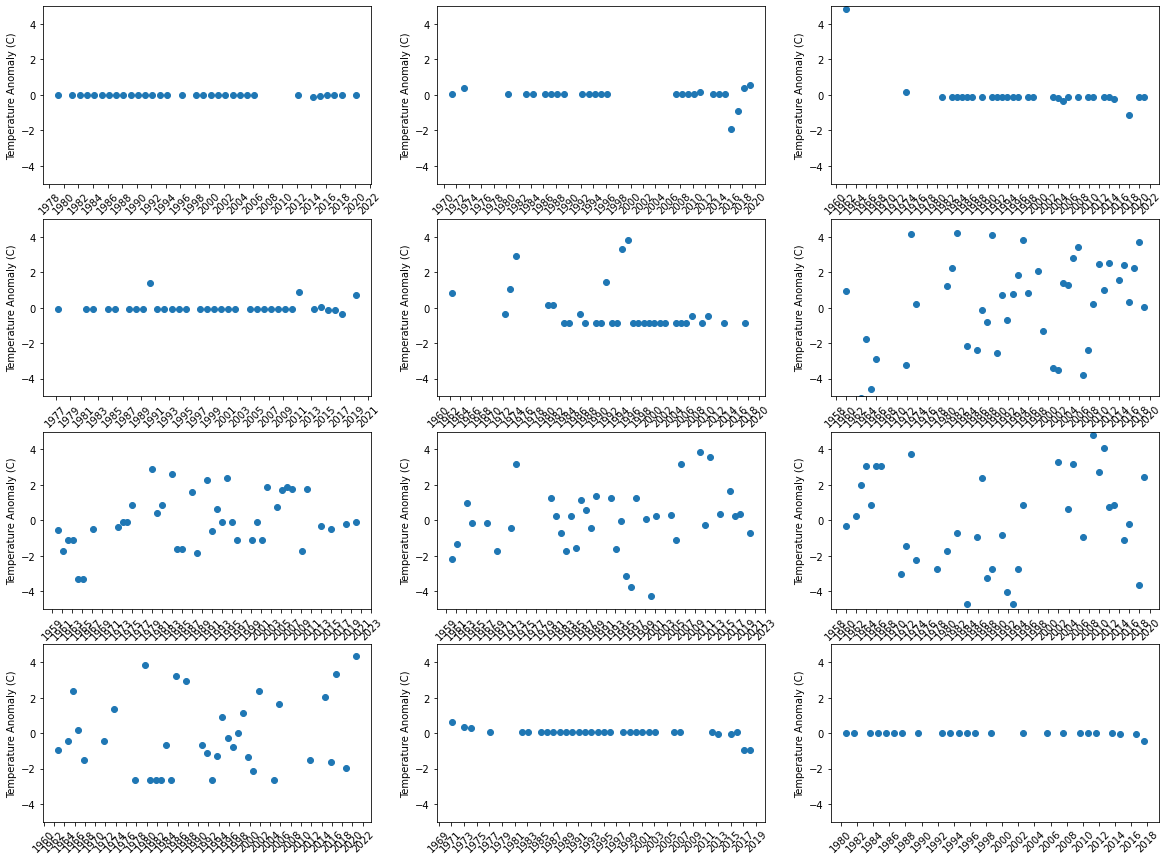

In [37]:

fig, axs = plt.subplots()
axs.set_axis_off()
fig.set_figheight(15)
fig.set_figwidth(20)

#left = datetime.date(2000, 1, 1)
#right = datetime.date(2021, 1, 1)


for i in range(0,12):
    axs = fig.add_subplot(4,3,i+1)
    axs.set_ylim([-5, 5])
    #axs.set_xlim([left, right])
    plt.scatter(anomaly[i].index, anomaly[i])
   
    # Major ticks every year.
    fmt_year = mdates.MonthLocator(interval=24)
    axs.xaxis.set_major_locator(fmt_year)
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation = 45)
    axs.set(ylabel="Temperature Anomaly (C)")

plt.show()

Temperature Trend = -0.01564672364672365
Temperature Trend = -0.04054505005561742
Temperature Trend = 0.002219251336898394
Temperature Trend = -0.013898172905525856
Temperature Trend = 0.08747411518826875
Temperature Trend = 0.039026065398016625
Temperature Trend = 0.032408906882591106
Temperature Trend = 0.01016477003319108
Temperature Trend = 0.04623439228702386
Temperature Trend = -0.01811766862170087
Temperature Trend = -0.00673913043478261


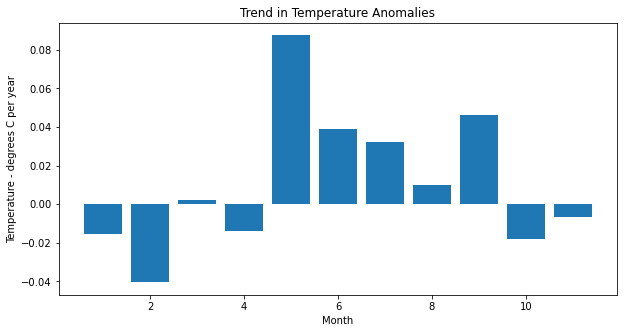

In [38]:
temp_trend_a = []
temp_nrmse_a = []
for i in range(1,12):
    #To perform the linear regression we need the dates to be numeric
    #date_ord = anomaly.index(datetime.date.toordinal)

    # perform regression
    coefficients, residuals, _, _, _ = np.polyfit(range(len(anomaly[i].index)),anomaly[i],1,full=True)
    #mse = residuals[0]/(len(anomaly[i].index))
    #nrmse = np.sqrt(mse)/(anomaly[i].max() - anomaly[i].min())
    temp_trend_a.append(coefficients[0])
    temp_nrmse_a.append(nrmse)
    print('Temperature Trend = ' + str(coefficients[0]))
    #print('NRMSE: ' + str(nrmse))
    
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(range(1,12), temp_trend_a)


plt.xlabel("Month")
plt.ylabel("Temperature - degrees C per year")
plt.title("Trend in Temperature Anomalies")

plt.show()

# Temperature Statistical Summary

In [39]:
import statsmodels.api as sm

In [40]:
ind = temp_grouped.get_group(9).sort_index().index.view(np.int64)//10**9
ind

array([-293414400, -231292800, -199756800, -168048000, -136771200,
       -105235200,  -73699200,   52963200,   84844800,   84931200,
         85881600,  115948800,  148176000,  275961600,  337910400,
        401328000,  465091200,  526176000,  528076800,  528076800,
        557625600,  591408000,  622771200,  685756800,  716774400,
        749260800,  749260800,  780192000,  811987200,  811987200,
       1031702400, 1094601600, 1126224000, 1126285200, 1126569600,
       1190160000, 1190160000, 1190219700, 1251763200, 1251807600,
       1252368000, 1283817600, 1284336000, 1284402000, 1315872000,
       1315932600, 1347926400, 1347991200, 1377993600, 1379894400,
       1379947200, 1441756800, 1441813200, 1442102400, 1473867600,
       1536067800, 1537315200, 1568160000, 1568717160])

In [41]:

X = [j for j in range(len(ind))]
y = temp_grouped.get_group(9).sort_index()
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print('The Statistical Summary for September:')
print(est2.summary())


The Statistical Summary for September:
                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.239
Date:                Thu, 03 Mar 2022   Prob (F-statistic):              0.270
Time:                        15:47:16   Log-Likelihood:                -144.29
No. Observations:                  59   AIC:                             292.6
Df Residuals:                      57   BIC:                             296.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

## What does all of this mean? 
From https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a

The top of our summary starts by giving us a few details we already know. Our **Dependent Variable** is ‘Time,’ we’ve using OLS known as Ordinary Least Squares, and the Date and Time we’ve created the **Model**. Next, it details our **Number of Observations** in the dataset. **Df Residuals** is another name for our Degrees of Freedom in our mode. This is calculated in the form of ‘n-k-1’ or ‘number of observations-number of predicting variables-1.’ **Df Model** numbers our predicting variables. Our **Covariance Type** is listed as nonrobust. Covariance is a measure of how two variables are linked in a positive or negative manner, and a robust covariance is one that is calculated in a way to minimize or eliminate variables, which is not the case here.

**R-squared** is possibly the most important measurement produced by this summary. R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables. In percentage terms, 0.338 would mean our model explains 33.8% of the change in our ‘temperature’ variable. **Adjusted R-squared** is important for analyzing multiple dependent variables’ efficacy on the model. Linear regression has the quality that your model’s R-squared value will never go down with additional variables, only equal or higher. Therefore, your model could look more accurate with multiple variables even if they are poorly contributing. The adjusted R-squared penalizes the R-squared formula based on the number of variables, therefore a lower adjusted score may be telling you some variables are not contributing to.

The **F-statistic** in linear regression is comparing your produced linear model for your variables against a model that replaces your variables’ effect to 0, to find out if your group of variables are statistically significant. To interpret this number correctly, using a chosen alpha value and an F-table is necessary. **Prob (F-Statistic)** uses this number to tell you the accuracy of the null hypothesis, or whether it is accurate that your variables’ effect is 0. In this case, it is telling us 4.29% chance of this. **Log-likelihood** is a numerical signifier of the likelihood that your produced model produced the given data. It is used to compare coefficient values for each variable in the process of creating the model. **AIC** and **BIC** are both used to compare the efficacy of models in the process of linear regression, using a penalty system for measuring multiple variables. These numbers are used for feature selection of variables.

Our first informative column is the **coefficient**. For our intercept, it is the value of the intercept. For each variable, it is the measurement of how change in that variable affects the independent variable. It is the ‘m’ in ‘y = mx + b’ One unit of change in the dependent variable will affect the variable’s coefficient’s worth of change in the independent variable. If the coefficient is negative, they have an inverse relationship. As one rises, the other falls.
Our **std error** is an estimate of the standard deviation of the coefficient, a measurement of the amount of variation in the coefficient throughout its data points. The **t** is related and is a measurement of the precision with which the coefficient was measured. A low std error compared to a high coefficient produces a high t statistic, which signifies a high significance for your coefficient.

**P>|t|** is one of the most important statistics in the summary. It uses the t statistic to produce the p value, a measurement of how likely your coefficient is measured through our model by chance. The p value of 0.043 for x1 is saying there is a 4.3% chance the x1 (time) variable has no affect on the dependent (temperature) variable.

[0.025 and 0.975] are both measurements of values of our coefficients within 95% of our data, or within two standard deviations. Outside of these values can generally be considered outliers.

**Omnibus** describes the normalcy of the distribution of our residuals using **skew** and **kurtosis** as measurements. A 0 would indicate perfect normalcy. **Prob(Omnibus)** is a statistical test measuring the probability the residuals are normally distributed. A 1 would indicate perfectly normal distribution. **Skew** is a measurement of symmetry in our data, with 0 being perfect symmetry. **Kurtosis** measures the peakiness of our data, or its concentration around 0 in a normal curve. Higher kurtosis implies fewer outliers.
**Durbin-Watson** is a measurement of homoscedasticity, or an even distribution of errors throughout our data. Heteroscedasticity would imply an uneven distribution, for example as the data point grows higher the relative error grows higher. Ideal homoscedasticity will lie between 1 and 2. **Jarque-Bera (JB)** and **Prob(JB)** are alternate methods of measuring the same value as Omnibus and Prob(Omnibus) using skewness and kurtosis. We use these values to confirm each other. **Condition number** is a measurement of the sensitivity of our model as compared to the size of changes in the data it is analyzing. Multicollinearity is strongly implied by a high condition number. Multicollinearity a term to describe two or more independent variables that are strongly related to each other and are falsely affecting our predicted variable by redundancy. **Condition number** is not relevent if there is only one dependent variable.

In [42]:
for i in range(1,13):
    ind = temp_grouped.get_group(i).sort_index().index.view(np.int64)//10**9
    X = [j for j in range(len(ind))]
    y = temp_grouped.get_group(i).sort_index()
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print('')
    print('The Statistical Summary for month number:' ,i)
    print(est2.summary())


The Statistical Summary for month number: 1
                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.1608
Date:                Thu, 03 Mar 2022   Prob (F-statistic):              0.690
Time:                        15:47:39   Log-Likelihood:                 64.811
No. Observations:                  65   AIC:                            -125.6
Df Residuals:                      63   BIC:                            -121.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

# Discharge

In [43]:
df_d = pd.read_csv('~/Research/Rivers/River_Discharge/ArcticGRO_discharge_data_Mackenzie.csv', parse_dates= [4], index_col = [4]) 
df_d = df_d[df_d['discharge'].notna()]
df_d

,river,agency,station_code,station_name,discharge,flag
date,,,,,,
1972-03-21,Mackenzie,Water Survey of Canada,10LC014,Arctic Red River,2290.0,A
1972-05-10,Mackenzie,Water Survey of Canada,10LC014,Arctic Red River,2970.0,A
1972-07-12,Mackenzie,Water Survey of Canada,10LC014,Arctic Red River,17600.0,A
1972-07-13,Mackenzie,Water Survey of Canada,10LC014,Arctic Red River,17100.0,A
1972-07-14,Mackenzie,Water Survey of Canada,10LC014,Arctic Red River,16600.0,A
...,...,...,...,...,...,...
2021-05-22,Mackenzie,Water Survey of Canada,10LC014,Arctic Red River,28208.0,P
2021-05-23,Mackenzie,Water Survey of Canada,10LC014,Arctic Red River,29445.0,P
2021-05-24,Mackenzie,Water Survey of Canada,10LC014,Arctic Red River,30216.0,P


In [44]:
discharge_grouped = df_d['discharge'].groupby(df_d.index.month)
discharge_grouped.agg("count")

date
1     1457
2     1328
3     1457
4     1449
5     1502
6     1440
7     1496
8     1505
9     1470
10    1519
11    1440
12    1478
Name: discharge, dtype: int64

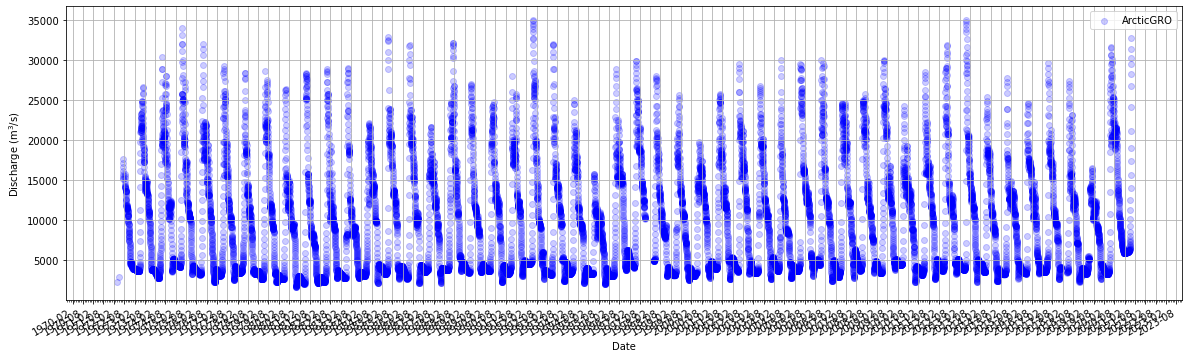

In [45]:
fig, ax = plt.subplots(figsize=(20,6))

ax.scatter(df_d.index.values, df_d.discharge, color = 'Blue', label = 'ArcticGRO', alpha = 0.2)


ax.set(xlabel="Date",
       ylabel="Discharge (m$^3$/s)")

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

ax.legend()
plt.grid()
plt.show()



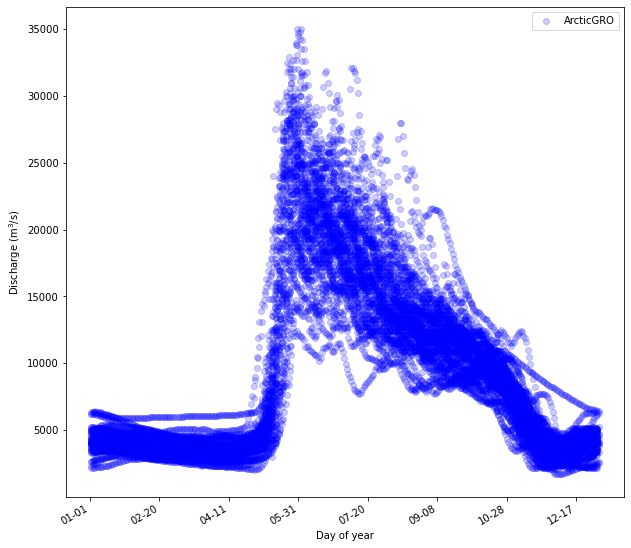

In [46]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(df_d.index.day_of_year, df_d['discharge'], color = 'Blue', label = 'ArcticGRO', alpha = 0.2)


ax.set(xlabel="Day of year",
       ylabel="Discharge (m$^3$/s)")
ax.legend()


# # Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# # Rotates and right aligns the x labels, and moves the bottom of the
# # axes up to make room for them.
fig.autofmt_xdate()

# ax.legend()
plt.show()

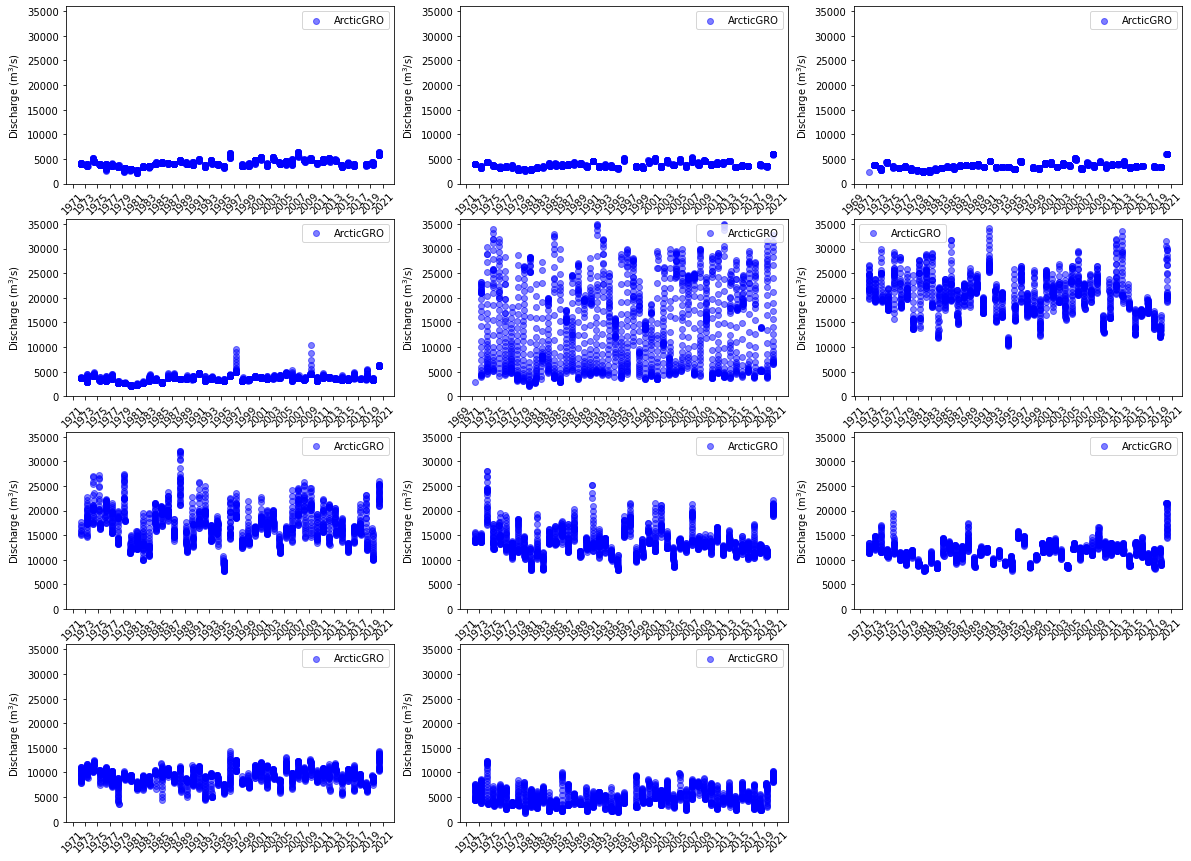

In [48]:
fig, axs = plt.subplots()
axs.set_axis_off()
fig.set_figheight(15)
fig.set_figwidth(20)

#left = datetime.date(1970, 1, 1)
#right = datetime.date(2021, 1, 1)


for i in range(1,12):
    axs = fig.add_subplot(4,3,i)
    axs.set_ylim([0, 36000])
    #axs.set_xlim([left, right])
    plt.scatter(discharge_grouped.get_group(i).index, discharge_grouped.get_group(i), color = 'Blue', label = 'ArcticGRO', alpha = 0.5)
    axs.legend()
   
    # Major ticks every other year.
    fmt_year = mdates.MonthLocator(interval=24)
    axs.xaxis.set_major_locator(fmt_year)
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation = 45)
    axs.set(ylabel="Discharge (m$^3$/s)")

axs.legend()
plt.show()


Discharge Trend = 0.7811806913271105
NRMSE: 0.16002385335817548
Discharge Trend = 0.673020705574955
NRMSE: 0.1720619116584452
Discharge Trend = 0.6194617232613833
NRMSE: 0.1554136681753127
Discharge Trend = 0.6937183933684311
NRMSE: 0.08721623614153054
Discharge Trend = 2.0103831278194293
NRMSE: 0.25809453030678586
Discharge Trend = -1.9330356745284967
NRMSE: 0.1697623866584549
Discharge Trend = -0.8782150855822363
NRMSE: 0.15363611183977022
Discharge Trend = -0.5995987809559002
NRMSE: 0.14411570089076173
Discharge Trend = 0.7149270516671128
NRMSE: 0.1519951038676344
Discharge Trend = 0.3173591001054175
NRMSE: 0.15474799191614685
Discharge Trend = 0.4638036472657792
NRMSE: 0.17342052779456768
Discharge Trend = 0.5247534728333401
NRMSE: 0.14970193279630353


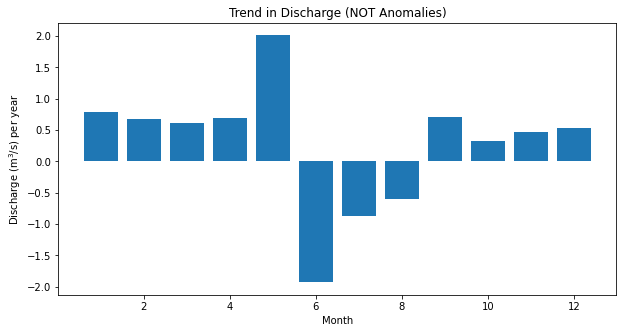

In [49]:
dis_trend = []
dis_nrmse = []

for i in range(1,13):
    #To perform the linear regression we need the dates to be numeric
    #date_ord = temp_grouped.get_group(i).index.values(datetime.date.toordinal)

    # perform regression
    coefficients, residuals, _, _, _ = np.polyfit(range(len(discharge_grouped.get_group(i).index.values)),discharge_grouped.get_group(i),1,full=True)
    mse = residuals[0]/(len(discharge_grouped.get_group(i).index))
    nrmse = np.sqrt(mse)/(discharge_grouped.get_group(i).max() - discharge_grouped.get_group(i).min())
    dis_trend.append(coefficients[0])
    dis_nrmse.append(nrmse)
    print('Discharge Trend = ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))
    
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(range(1,13), dis_trend)


plt.xlabel("Month")
plt.ylabel("Discharge (m$^3$/s) per year")
plt.title("Trend in Discharge (NOT Anomalies)")

plt.show()

### Mean discharge for each month:
monthly_mean_discharge is the mean for each month in the series (lots of months). <br />
monthly_mean_d is the mean of all the monthly means for each month.

In [50]:
monthly_mean_discharge = df_d.discharge.resample('M').mean().dropna()
monthly_mean_d = df_d.discharge.groupby(df_d.discharge.index.month).agg('mean')

monthly_min_discharge = df_d.discharge.resample('M').min().dropna()
monthly_min_d = df_d.discharge.groupby(df_d.discharge.index.month).agg('min')

monthly_max_discharge = df_d.discharge.resample('M').max().dropna()
monthly_max_d = df_d.discharge.groupby(df_d.discharge.index.month).agg('max')

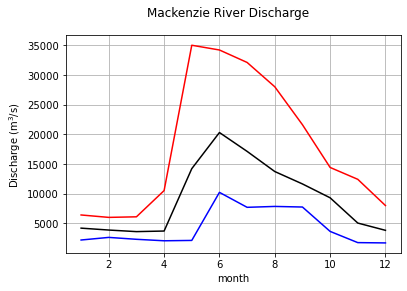

In [51]:
fig, ax = plt.subplots()
fig.suptitle('Mackenzie River Discharge')

ax.plot(monthly_mean_d, label = 'Mean', color = 'black')
ax.plot(monthly_min_d, label = 'Min', color = 'blue')
ax.plot(monthly_max_d, label = 'Max', color = 'red')

ax.set(ylabel = "Discharge (m$^3$/s)", xlabel = 'month')
plt.grid()

## Discharge Anomalies

In [52]:
anomaly_dis = [] # The anomaly for every month in the entire series

for i in range(1,13):
    diff = monthly_mean_discharge.groupby(monthly_mean_discharge.index.month).get_group(i) - monthly_mean_d[i]
    anomaly_dis.append(diff)

Discharge Trend = 24.336613350840015
NRMSE: 0.1814210716961406
Discharge Trend = 19.199352878651858
NRMSE: 0.1807163102761726
Discharge Trend = 21.523277317103936
NRMSE: 0.1571565085265116
Discharge Trend = 19.680782312925167
NRMSE: 0.161572896682775
Discharge Trend = 67.30517588673185
NRMSE: 0.18185610066022695
Discharge Trend = -57.013294253871784
NRMSE: 0.19618376052383266
Discharge Trend = -22.711254114549025
NRMSE: 0.18320592886770068
Discharge Trend = -17.496567013902325
NRMSE: 0.1947961692772485
Discharge Trend = 22.207561224489783
NRMSE: 0.18117190479722656
Discharge Trend = 11.12907175773535
NRMSE: 0.22253880098348847
Discharge Trend = 15.643455999421045
NRMSE: 0.20656997594204762
Discharge Trend = 15.019529642428592
NRMSE: 0.15180683918162002


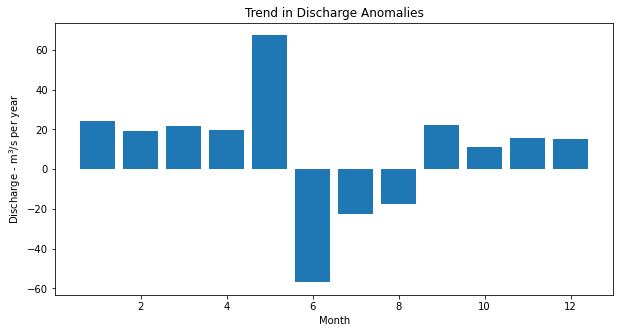

In [53]:
dis_trend_a = [] # The anomaly trend binned for each month (1 - 12) for the entire series
dis_nrmse_a = [] # The anomaly normed RMS error binned for each month (1 - 12_ for the entire series

for i in range(0,12):
    
    coefficients, residuals, _, _, _ = np.polyfit(range(len(anomaly_dis[i].index)),anomaly_dis[i],1,full=True)
    mse = residuals[0]/(len(anomaly_dis[i].index))
    nrmse = np.sqrt(mse)/(anomaly_dis[i].max() - anomaly_dis[i].min())
    dis_trend_a.append(coefficients[0])
    dis_nrmse_a.append(nrmse)
    print('Discharge Trend = ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))
    
fig = plt.figure(figsize = (10, 5))
plt.bar(range(1,13), dis_trend_a)


plt.xlabel("Month")
plt.ylabel("Discharge - m$^3$/s per year")
plt.title("Trend in Discharge Anomalies")

plt.show()

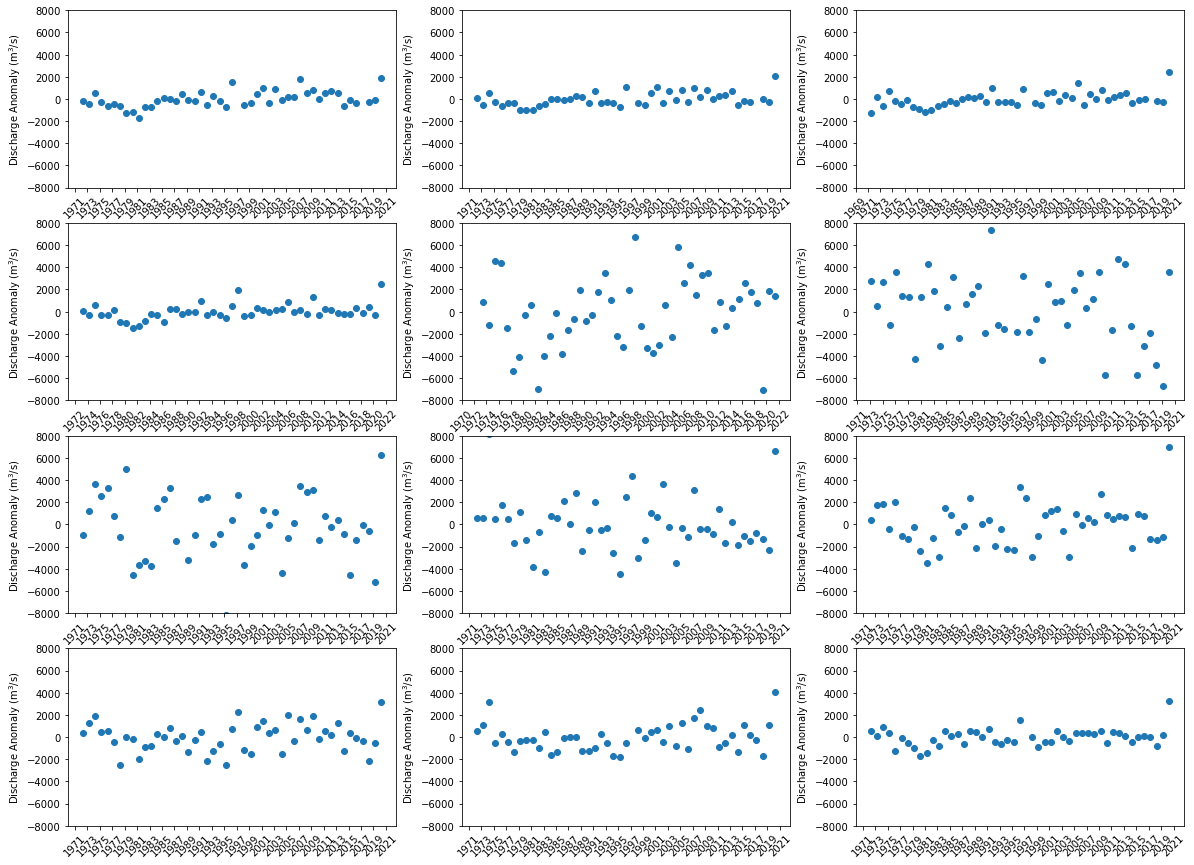

In [55]:
fig, axs = plt.subplots()
axs.set_axis_off()
fig.set_figheight(15)
fig.set_figwidth(20)

#left = datetime.date(1972, 1, 1)
#right = datetime.date(2021, 6, 1)


for i in range(0,12):
    axs = fig.add_subplot(4,3,i+1)
    axs.set_ylim([-8000, 8000])
    #axs.set_xlim([left, right])
    plt.scatter(anomaly_dis[i].index, anomaly_dis[i])
   
    # Major ticks every other year.
    fmt_year = mdates.MonthLocator(interval=24)
    axs.xaxis.set_major_locator(fmt_year)
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation = 45)
    axs.set(ylabel="Discharge Anomaly (m$^3$/s)")

plt.show()

In [56]:
dis_trend_a # The anomaly trend binned for each month (1 - 12) for the entire series

[24.336613350840015,
 19.199352878651858,
 21.523277317103936,
 19.680782312925167,
 67.30517588673185,
 -57.013294253871784,
 -22.711254114549025,
 -17.496567013902325,
 22.207561224489783,
 11.12907175773535,
 15.643455999421045,
 15.019529642428592]

In [57]:
dis_trend # The trend binned for each month (1 - 12) for the entire series

[0.7811806913271105,
 0.673020705574955,
 0.6194617232613833,
 0.6937183933684311,
 2.0103831278194293,
 -1.9330356745284967,
 -0.8782150855822363,
 -0.5995987809559002,
 0.7149270516671128,
 0.3173591001054175,
 0.4638036472657792,
 0.5247534728333401]

Why are they different?

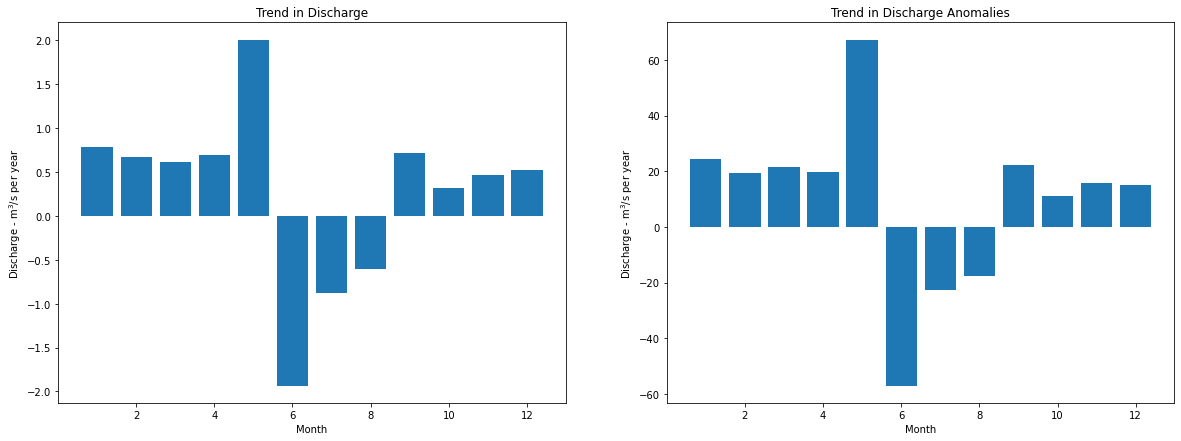

In [58]:
fig, axs = plt.subplots()
axs.set_axis_off()
fig.set_figheight(7)
fig.set_figwidth(20)

axs = fig.add_subplot(1,2,1)
plt.bar(range(1,13), dis_trend)
plt.xlabel("Month")
plt.ylabel("Discharge - m$^3$/s per year")
plt.title("Trend in Discharge")

axs = fig.add_subplot(1,2,2)
plt.bar(range(1,13), dis_trend_a)
plt.xlabel("Month")
plt.ylabel("Discharge - m$^3$/s per year")
plt.title("Trend in Discharge Anomalies")

plt.show()

# Discharge Monthly Statistical Summary

In [59]:
ind = discharge_grouped.get_group(1).sort_index()
ind.index

DatetimeIndex(['1973-01-01', '1973-01-02', '1973-01-03', '1973-01-04',
               '1973-01-05', '1973-01-06', '1973-01-07', '1973-01-08',
               '1973-01-09', '1973-01-10',
               ...
               '2021-01-22', '2021-01-23', '2021-01-24', '2021-01-25',
               '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29',
               '2021-01-30', '2021-01-31'],
              dtype='datetime64[ns]', name='date', length=1457, freq=None)

In [60]:
for i in range(1,13):
    #ind = discharge_grouped.get_group(i).sort_index().index.view(np.int64)//10**9
    ind = discharge_grouped.get_group(i).sort_index()
    #X = ind.index.view(np.int64)//10**9
    X = [j for j in range(len(ind))]
    y = discharge_grouped.get_group(i).sort_index()
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print('')
    print('The Statistical Summary for month number:' ,i)
    print(est2.summary())


The Statistical Summary for month number: 1
                            OLS Regression Results                            
Dep. Variable:              discharge   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     344.4
Date:                Thu, 03 Mar 2022   Prob (F-statistic):           3.54e-69
Time:                        15:50:54   Log-Likelihood:                -11560.
No. Observations:                1457   AIC:                         2.312e+04
Df Residuals:                    1455   BIC:                         2.313e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

# Heat Flux

%%latex

The monthly means of Temperature (C) and Q (m$^3$/s) are used to calculate heat flux (HF) based on the following formula: <br />

\begin{equation}
HF = 86400 Cp∙\rho∙Q∙WT∙N/10$^12$
\end{equation}

Where HF is the total heat flux per month (106 MJ) relative to water freezing point; Q is the monthly mean discharge (m$^3$/s); WT is the monthly mean water temperature (◦C); N refers to number of days in a given month; Cp is the specific heat of river water (4.184 J/(◦C g)); $\rho$ is
water density (10$^6$ g/m$^3$); and the constant 86400 refers to number of seconds in a day.

Water density varies with temperature and its variation is very small for water temperature range from 0 to 20 ◦C. The density used above (i.e. 10$^6$g/m$^3$) is the maximum at 4 ◦C. Heat transport by ice, sediment and other debris in the river water is difficult to quantify and
not considered in this analysis.

In [61]:
Cp = 4.184
rho = 10**6
s = 86400


In [62]:
# To get N (Number of days in month):
def is_leap_year(year):
    return (year % 4 == 0) and (year % 100 != 0) or (year % 400 == 0)

def days_in_month(month, year):

    if month in [9, 4, 6, 11]:
        return 30

    elif month in [1, 3, 5, 7, 8, 10, 12]:
        return 31        

    elif month == 2 and is_leap_year(year) == True:
        return 29

    elif month == 2 and is_leap_year(year) == False:
        return 28

    else:
        return None

monthly_mean_discharge is the mean for each month in the series (lots of months). <br />
monthly_mean_temperature is the mean for each month in the series (237 months). <br />

In [65]:
monthly_mean_discharge

date
1972-03-31     2290.000000
1972-05-31     2970.000000
1972-07-31    16137.500000
1972-08-31    14288.235294
1972-09-30    11993.333333
                  ...     
2021-01-31     6046.419355
2021-02-28     5943.428571
2021-03-31     6032.100000
2021-04-30     6184.466667
2021-05-31    15607.538462
Name: discharge, Length: 581, dtype: float64

In [66]:
monthly_mean_temperature

1960-06-30    12.750000
1960-07-31    15.550000
1960-08-31    13.533333
1960-09-30     9.400000
1961-07-31    14.400000
                ...    
2020-07-31    16.000000
2020-08-31    15.000000
2020-10-31     7.000000
2021-01-31     0.000000
2021-03-31     0.000000
Name: Temp, Length: 409, dtype: float64

We need to scale mean discharge and mean temperature so the length of each series matches. Then, for each time step, grab the month and year and put it in to the days_in_month function above to get N (number of days). Then we can proceed with the heat flux formula.

In [67]:
monthly_mean_temperature = pd.DataFrame(monthly_mean_temperature)

In [68]:
monthly_mean_discharge = pd.DataFrame(monthly_mean_discharge)

In [69]:
result = pd.concat([monthly_mean_temperature.Temp, monthly_mean_discharge.discharge], axis = 1, join = 'inner')

In [70]:
HF = []
for i in range(0, len(result.index)):
    N = days_in_month(result.index.month[i], result.index.year[i])
    heat = 86400 * Cp * rho * result.Temp[i] * result.discharge[i] * N/(10**12)
    HF.append(heat)
    

In [71]:
result['HF'] = HF

In [72]:
result

,Temp,discharge,HF
1972-05-31,0.500000,2970.000000,1.664154e+04
1972-07-31,15.725000,16137.500000,2.843767e+06
1972-08-31,15.300000,14288.235294,2.449837e+06
1972-09-30,8.266667,11993.333333,1.075219e+06
1973-05-31,1.900000,15062.903226,3.207225e+05
...,...,...,...
2020-07-31,16.000000,23350.741935,4.186854e+06
2020-08-31,15.000000,20362.645161,3.422887e+06
2020-10-31,7.000000,12412.419355,9.736920e+05
2021-01-31,0.000000,6046.419355,0.000000e+00


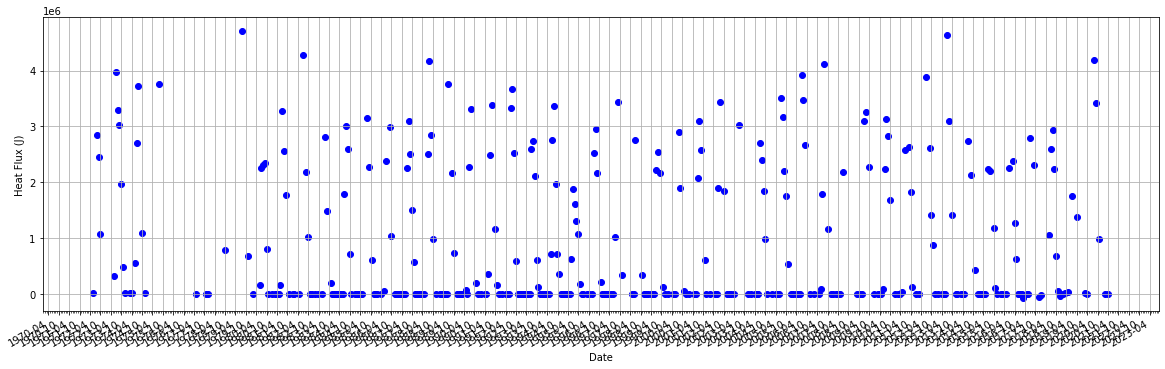

In [75]:
fig, ax = plt.subplots(figsize=(20,6))

ax.scatter(result.index.values, result.HF, color = 'Blue')


ax.set(xlabel="Date",
       ylabel="Heat Flux (J)")

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()


plt.grid()
plt.show()

In [76]:
result_grouped = result.groupby(result.index.month)
result_grouped.agg("count")
# This is the number of measurements for each month

,Temp,discharge,HF
1,31,31,31
2,24,24,24
3,27,27,27
4,34,34,34
5,32,32,32
6,39,39,39
7,33,33,33
8,32,32,32
9,29,29,29
10,31,31,31


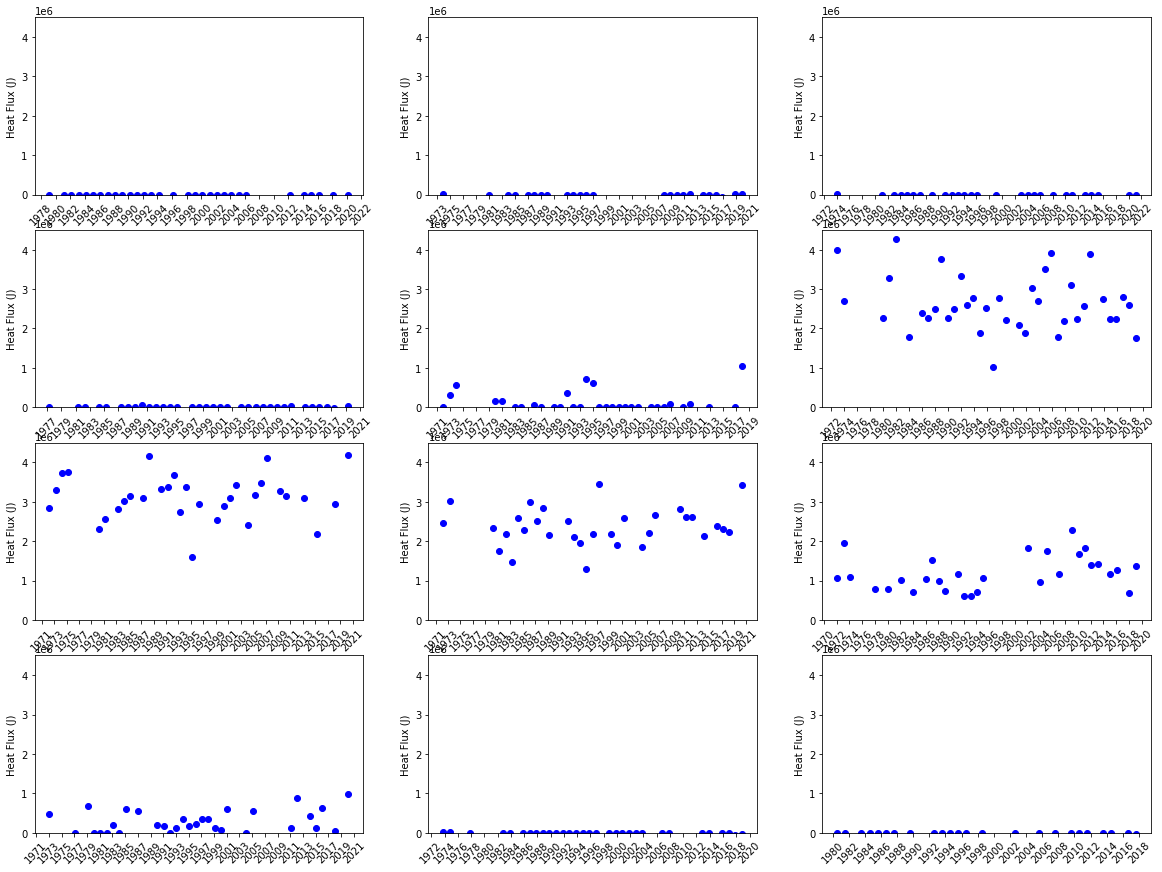

In [78]:
fig, axs = plt.subplots()
axs.set_axis_off()
fig.set_figheight(15)
fig.set_figwidth(20)


for i in range(1,13):
    axs = fig.add_subplot(4,3,i)
    axs.set_ylim([0, 4.5*10**6])
    plt.scatter(result_grouped.get_group(i).index, result_grouped.HF.get_group(i), color = 'Blue')
    
   
    # Major ticks every year.
    fmt_year = mdates.MonthLocator(interval=24)
    axs.xaxis.set_major_locator(fmt_year)
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation = 45)
    axs.set(ylabel="Heat Flux (J)")


plt.show()



Heat flux monthly trends:

Heat Flux Trend = -28.607433259354842
NRMSE: 0.1895883002526982
Heat Flux Trend = -393.2230851773221
NRMSE: 0.16805043950453727
Heat Flux Trend = -123.31610052923082
NRMSE: 0.13416826015889538
Heat Flux Trend = 90.96706827303888
NRMSE: 0.1852979933827207
Heat Flux Trend = -596.8521772469165
NRMSE: 0.24189879173646714
Heat Flux Trend = -4579.921218039442
NRMSE: 0.20975387384793395
Heat Flux Trend = -4894.026679443874
NRMSE: 0.1979906186887938
Heat Flux Trend = 7192.88526118599
NRMSE: 0.218498474112271
Heat Flux Trend = 14362.607342410372
NRMSE: 0.2502886320173441
Heat Flux Trend = 8992.017156040258
NRMSE: 0.269858709900059
Heat Flux Trend = -815.9981831535489
NRMSE: 0.13710330701151324
Heat Flux Trend = -284.79975441808716
NRMSE: 0.18134948437740073


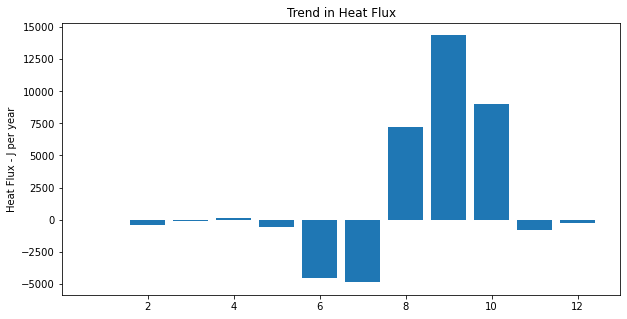

In [82]:
HF_trend = [] # The  trend binned for each month (1 - 12) for the entire series
HF_nrmse = [] # The  normed RMS error binned for each month (1 - 12_ for the entire series

for i in [x for x in range(1,13)]:
    
    coefficients, residuals, _, _, _ = np.polyfit(range(len(result_grouped.get_group(i).index)),result_grouped.HF.get_group(i),1,full=True)
    mse = residuals[0]/(len(result_grouped.get_group(i).index))
    nrmse = np.sqrt(mse)/(result_grouped.HF.get_group(i).max() - result_grouped.HF.get_group(i).min())
    HF_trend.append(coefficients[0])
    #HF_nrmse.append(nrmse)
    print('Heat Flux Trend = ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))
    
fig = plt.figure(figsize = (10, 5))
plt.bar(range(1,13), HF_trend)


#plt.xlabel("Month")
plt.ylabel("Heat Flux - J per year")
plt.title("Trend in Heat Flux")

plt.show()

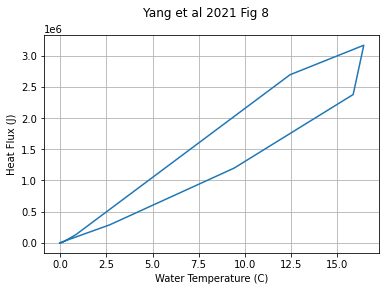

In [83]:
fig, ax = plt.subplots()
fig.suptitle('Yang et al 2021 Fig 8')

ax.plot(result_grouped.Temp.agg("mean"), result_grouped.HF.agg("mean"))
ax.set(xlabel = "Water Temperature (C)")
ax.set(ylabel = "Heat Flux (J)")

plt.grid()

I have to figure out how to put the month markers on the line

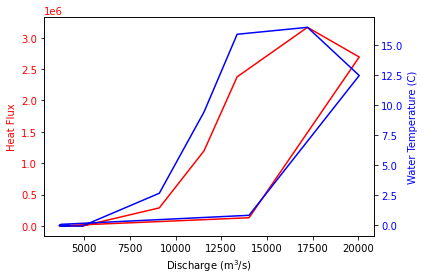

In [84]:
fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('Discharge (m$^3$/s)')
ax1.set_ylabel('Heat Flux', color=color)
ax1.plot(result_grouped.discharge.agg("mean"), result_grouped.HF.agg("mean"), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Water Temperature (C)', color=color)  # we already handled the x-label with ax1
ax2.plot(result_grouped.discharge.agg("mean"), result_grouped.Temp.agg("mean"), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

This matches Yang et al 2021 fig 8 nicely! 

# Heat Flux Statistical Summary

In [85]:
ind = result_grouped.get_group(1).sort_index()
ind.index

DatetimeIndex(['1980-01-31', '1982-01-31', '1983-01-31', '1984-01-31',
               '1985-01-31', '1986-01-31', '1987-01-31', '1988-01-31',
               '1989-01-31', '1990-01-31', '1991-01-31', '1992-01-31',
               '1993-01-31', '1994-01-31', '1995-01-31', '1997-01-31',
               '1999-01-31', '2000-01-31', '2001-01-31', '2002-01-31',
               '2003-01-31', '2004-01-31', '2005-01-31', '2006-01-31',
               '2007-01-31', '2013-01-31', '2015-01-31', '2016-01-31',
               '2017-01-31', '2019-01-31', '2021-01-31'],
              dtype='datetime64[ns]', freq=None)

In [86]:
del est2

In [87]:
for i in range(1,13):
    
    ind = result_grouped.get_group(i).sort_index()
    
    X = [j for j in range(len(ind))]
    y = result_grouped.HF.get_group(i).sort_index()
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print('')
    print('The Statistical Summary for month number:' ,i)
    print(est2.summary())


The Statistical Summary for month number: 1
                            OLS Regression Results                            
Dep. Variable:                     HF   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     3.325
Date:                Thu, 03 Mar 2022   Prob (F-statistic):             0.0785
Time:                        15:54:18   Log-Likelihood:                -249.44
No. Observations:                  31   AIC:                             502.9
Df Residuals:                      29   BIC:                             505.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  